In [ ]:
### Get all the playlists of the current user and analyse the tracks inside the playlist

In [1]:
import json
from requests import post, get
import base64
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
CLIENT_ID = "d149816553324aa1a4e335d83f05bbcb"
CLIENT_SECRET = "54ade9c1100349feb994eb3ef4da6ce9"
USERNAME="manzl017"
redirect_uri="https://google.com"
scope="user-read-private user-read-email user-library-read playlist-read-private playlist-read-collaborative"

RAPID_ANALYSIS_TOKEN = "8d3ce1ac10msheb93b58121f294cp12f400jsndb93cef60765"

In [3]:
def tokenByClientCredentials():
    auth_string = CLIENT_ID + ":" + CLIENT_SECRET
    auth_bytes = auth_string.encode("utf-8")
    auth_base64 = str(base64.b64encode(auth_bytes), "utf-8")

    url = "https://accounts.spotify.com/api/token"
    headers = {
        "Authorization" : "Basic " + auth_base64,
        "Content-Type" : "application/x-www-form-urlencoded"
    } 
    data = {"grant_type" : "client_credentials"}
    result = post(url, headers=headers, data=data)
    json_result = json.loads(result.content)
    token = json_result["access_token"]
    return token

def tokenByAuthorizationCode():
    spoti = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET))
    token = util.prompt_for_user_token(USERNAME, scope, client_id=CLIENT_ID, client_secret=CLIENT_SECRET, redirect_uri=redirect_uri)
    return token

In [4]:
# generate Token
#token = tokenByClientCredentials()

In [5]:
# generate Token
userToken = tokenByAuthorizationCode()
headers = {
        "Authorization" : "Bearer " + userToken
}


In [6]:
def searchArtist(token, artist_name):
    url = "https://api.spotify.com/v1/search"
    headers = {
        "Authorization" : "Bearer " + token
    }
    query = f"?q={artist_name}&type=artist&limit=1"
    query_url = url + query
    result = get(query_url, headers=headers)
    data = result.json()
    print(data)

# E3: get new album releases
def getAlbumNewReleases(token):
    url = "https://api.spotify.com/v1/browse/new-releases"
    result = get(url, headers=headers)
    data = result.json()
    return data

def getDataByUrl(url):
    result = get(url, headers=headers)
    data = result.json()
    return data


#newReleasesAlbum = getAlbumNewReleases(userToken)

In [7]:
# E3: get new album releases
def getUserSavedTracks():
    url = "https://api.spotify.com/v1/me/tracks?limit=50"
    result = get(url, headers=headers)
    data = result.json()
    return data

#userSavedTracks = getUserSavedTracks()

In [8]:
def getTrackAnalysis(trackId, token):
    url = "https://track-analysis.p.rapidapi.com/pktx/spotify/" + trackId
    headers = {
        "x-rapidapi-host" : "track-analysis.p.rapidapi.com",
    	"x-rapidapi-key" : token
    }
    result = get(url, headers=headers)
    data = result.json()
    return data


In [9]:
favouriteSongs = pd.DataFrame(getUserSavedTracks())
favouriteSongs.tail()

,href,items,limit,next,offset,previous,total
45,https://api.spotify.com/v1/me/tracks?offset=0&...,"{'added_at': '2025-08-29T16:34:48Z', 'track': ...",50,https://api.spotify.com/v1/me/tracks?offset=50...,0,None,2805
46,https://api.spotify.com/v1/me/tracks?offset=0&...,"{'added_at': '2025-08-29T16:33:05Z', 'track': ...",50,https://api.spotify.com/v1/me/tracks?offset=50...,0,None,2805
47,https://api.spotify.com/v1/me/tracks?offset=0&...,"{'added_at': '2025-08-29T16:28:37Z', 'track': ...",50,https://api.spotify.com/v1/me/tracks?offset=50...,0,None,2805
48,https://api.spotify.com/v1/me/tracks?offset=0&...,"{'added_at': '2025-08-29T13:54:02Z', 'track': ...",50,https://api.spotify.com/v1/me/tracks?offset=50...,0,None,2805
49,https://api.spotify.com/v1/me/tracks?offset=0&...,"{'added_at': '2025-08-29T12:46:31Z', 'track': ...",50,https://api.spotify.com/v1/me/tracks?offset=50...,0,None,2805


In [10]:
def getUserProfile():
    url = "https://api.spotify.com/v1/me"
    result = get(url, headers=headers)
    data = result.json()
    return data


def getUserPlaylist(userId):
    url = "https://api.spotify.com/v1/me/playlists"
    result = get(url, headers=headers)
    data = result.json()
    return data


In [11]:
# E11: Sort the DataFrame inplace by eye color in ascending and by age in descending order (1 point)
myProfile = getUserProfile()
userId = myProfile["id"]
print(userId)
myPlaylists = getUserPlaylist(userId)

manzl017


In [41]:
# E12: Remove the columns sex and retired from the dataset inplace (1 point)
playlists = myPlaylists["items"]
dfPlaylists = pd.DataFrame(playlists)
dfPlaylists.columns

dfPlaylists["name"]

0                          Beatport Best New Tech House
1     Beatport Best New Electro (Modern / Classic / ...
2                         Beatport Best New Drum & Bass
3                              Beatport Top 100 - Today
4                                               Käule 6
5                                                    🔥 
6                                    Volleyball Gamemix
7                         playlist full of home runs ✨ 
8                                              Vorglühn
9                                          MelodicHouse
10                                            TechHouse
11                                           PartyVibes
12                                               Tekkno
13                                                  DnB
14                                          SummerVibes
15                                       Volleyball_vtr
16                                              Käule 5
17                                Motivation Mus

In [40]:
#build dataframe

tracksPlaylistsDf = pd.DataFrame()

for playlist in playlists:
    href = playlist["tracks"]["href"]  
    tracksArray = getDataByUrl(href + "?limit=100")["items"] #limit 100
    tracksDf = pd.DataFrame(tracksArray)
    #todo: trackanalysis hinzufügen
    tracksDf["ownerId"] = playlist["owner"]["id"]
    tracksDf["playlistId"] = playlist["id"]
    tracksDf["playlistName"] = playlist["name"]
    tracksPlaylistsDf = pd.concat([tracksPlaylistsDf, tracksDf],ignore_index=True)

In [23]:
tracksPlaylistsDf.drop(["added_at", "is_local", "primary_color", "added_by", "video_thumbnail"], axis = 1, inplace=True)

#add for the columns with null vaules
tracksPlaylistsDf["trackId"] = {}
tracksPlaylistsDf["albumId"] = {}
tracksPlaylistsDf["trackName"] = {}
tracksPlaylistsDf["albumName"] = {}
tracksPlaylistsDf["analysis"] = {}

In [24]:

#add values
for idx, track in enumerate(tracksPlaylistsDf["track"]):
    trackId = track["id"]
    tracksPlaylistsDf.at[idx, "trackId"] = trackId
    tracksPlaylistsDf.at[idx, "albumId"] = track["album"]["id"]
    tracksPlaylistsDf.at[idx, "trackName"] = track["name"]
    tracksPlaylistsDf.at[idx, "albumName"] = track["album"]["name"]
    #tracksPlaylistsDf.at[idx, "analysis"] = getTrackAnalysis(trackId, RAPID_ANALYSIS_TOKEN)

tracksPlaylistsDf

,track,ownerId,playlistId,playlistName,trackId,albumId,trackName,albumName,analysis
0,"{'preview_url': None, 'available_markets': ['A...",beatportprofile,6Pbk82RPOKWD7k6dNcqq9f,Beatport Best New Tech House,62EGDr4h5bLfDUPHxpdYqd,3ZwOS1DTynoMRQ1r35mM2t,KO,KO EP,NaN
1,"{'preview_url': None, 'available_markets': ['A...",beatportprofile,6Pbk82RPOKWD7k6dNcqq9f,Beatport Best New Tech House,358ZEia3305jUWR0VkEYZa,7LB59laakXmWfSDtgbN23x,Big Nrg - Radio Mix,Big Nrg,NaN
2,"{'preview_url': None, 'available_markets': ['A...",beatportprofile,6Pbk82RPOKWD7k6dNcqq9f,Beatport Best New Tech House,0kC5dxaxWFIIbxechOwi4H,2y7i20O46cC3zH8udJIvUr,Make You Move,Make You Move EP,NaN
3,"{'preview_url': None, 'available_markets': ['A...",beatportprofile,6Pbk82RPOKWD7k6dNcqq9f,Beatport Best New Tech House,10KGZtypjDfvr3bT7Yjvwm,5hO7LAhaoYoVmQICrAjwlm,Boom Boom - Extended Mix,Boom Boom,NaN
4,"{'preview_url': None, 'available_markets': ['A...",beatportprofile,6Pbk82RPOKWD7k6dNcqq9f,Beatport Best New Tech House,1EQzWxuOJUDFyZ0j2M2ipc,7br29bJDOHWVjz1T02OnMg,Panty Droppa - Extended,Panty Droppa,NaN
...,...,...,...,...,...,...,...,...,...
1758,"{'preview_url': None, 'available_markets': [],...",manzl017,46rskYxbQiM53YUApXD6Cs,Motivations Mix,0JhKJg5ejeQ8jq89UQtnw8,4mkvtXQd6rD7zuAHhexEvb,Levels - Radio Edit,Levels,NaN
1759,"{'preview_url': None, 'available_markets': ['C...",manzl017,46rskYxbQiM53YUApXD6Cs,Motivations Mix,5p3SJ3CYqrmFbboAtfNo5n,5bRrEsH3Mjl8O0lpUgdIHI,Memories (feat. Kid Cudi),One More Love,NaN
1760,"{'preview_url': None, 'available_markets': ['A...",manzl017,46rskYxbQiM53YUApXD6Cs,Motivations Mix,1VSuFS7PahCN3SWbOcQ98m,57lgFncHBYu5E3igZnuCJK,forget me too (feat. Halsey),Tickets To My Downfall,NaN
1761,"{'preview_url': None, 'available_markets': ['A...",manzl017,46rskYxbQiM53YUApXD6Cs,Motivations Mix,11ckOzqGFuO63cTmkCuaLm,0mRMduZ5yWZ1YMhIQKLpN4,Come & Go (with Marshmello),Come & Go (with Marshmello),NaN


In [25]:
tracksPlaylistsDf["playlistName"].value_counts()

playlistName
Beatport Best New Tech House                              100
Beatport Best New Electro (Modern / Classic / Detroit)    100
Beatport Best New Drum & Bass                             100
playlist full of home runs ✨                              100
PartyVibes                                                100
Volleyball Gamemix                                        100
SummerVibes                                               100
Motivations Mix                                           100
EDM                                                       100
Motivation Music 2025                                     100
DnB                                                       100
Beatport Top 100 - Today                                   85
Zugfahren                                                  85
Käule 6                                                    81
Ballerman                                                  74
Käule 5                                                  

In [34]:
tracksPlaylistsDf["ownerId"].value_counts()

ownerId
manzl017                        1004
beatportprofile                  300
yeahthejacko                     100
lithuaniahq                      100
317j7n6nrjhmndfpji3m75372mpm      85
119701354                         65
guenther-patrick                  56
5ha8mupe4kz2xlrf8dpr7llxd         53
Name: count, dtype: int64

In [26]:
tracksPlaylistsDf["trackId"].nunique()

1678

In [27]:
tracksPlaylistsDf["albumName"].value_counts()


albumName
Brennan Heart & Friends               16
Hardwell Presents Revealed, Vol. 9     9
Layers                                 5
Lost                                   5
beerbongs & bentleys                   5
                                      ..
Silence (Illenium Remix)               1
Alone, Pt. II                          1
The Marshall Mathers LP                1
Popcorn (GATTÜSO Remix)                1
Rumors                                 1
Name: count, Length: 1539, dtype: int64

In [33]:
tracksPlaylistsDf[tracksPlaylistsDf['albumName'] == "Brennan Heart & Friends"].loc[ : , 'playlistName':]

,playlistName,trackId,albumId,trackName,albumName,analysis
1640,EDM,02Ga2Wm48J4jlXyl3epw56,4wkYuAZysC3pGnqMeHYA2A,Journey,Brennan Heart & Friends,NaN
1644,EDM,2UnT0N4kOlmx1Bi5ASivdL,4wkYuAZysC3pGnqMeHYA2A,Everything We Are,Brennan Heart & Friends,NaN
1645,EDM,2MbrobssYfmPNvZtSmdU9t,4wkYuAZysC3pGnqMeHYA2A,Katana,Brennan Heart & Friends,NaN
1646,EDM,1GenPdoR40cmoS90Nx8A9u,4wkYuAZysC3pGnqMeHYA2A,Addicted To The Bass,Brennan Heart & Friends,NaN
1647,EDM,5hG2ZvkMjgaUt8ajjPmjx7,4wkYuAZysC3pGnqMeHYA2A,When Tomorrow Comes,Brennan Heart & Friends,NaN
1648,EDM,7Ef9F0u5sXpz2qf4rq3qoT,4wkYuAZysC3pGnqMeHYA2A,Heroes & Legends,Brennan Heart & Friends,NaN
1649,EDM,0wBAuPRDaurDBZ8ZfIA5yI,4wkYuAZysC3pGnqMeHYA2A,Take Your Pain (feat. Armen Paul),Brennan Heart & Friends,NaN
1650,EDM,5XSwR4hZ0nY4HEuWG81pT2,4wkYuAZysC3pGnqMeHYA2A,Stand Together (feat. Mikel Franco),Brennan Heart & Friends,NaN
1651,EDM,0gaCBO13FzHvHayORq4PHr,4wkYuAZysC3pGnqMeHYA2A,Time Is Now (I AM HARDSTYLE In Concert Theme),Brennan Heart & Friends,NaN
1652,EDM,72gbWRPK3743mzNCTVBsg5,4wkYuAZysC3pGnqMeHYA2A,Untouchable,Brennan Heart & Friends,NaN


In [35]:
tracksPlaylistsDf[tracksPlaylistsDf['ownerId'] == "5ha8mupe4kz2xlrf8dpr7llxd"].loc[ : , 'playlistName':]

,playlistName,trackId,albumId,trackName,albumName,analysis
679,Vorglühn,1t0Jmqg1pKVBbxjQFZebeR,3AAwKutHRWyftJ2GrFdPX9,Marea (we’ve lost dancing),Marea (we’ve lost dancing),NaN
680,Vorglühn,6VfNPL93TsZpmwpe2BJxNc,6hW5N53gZtSPJQWExInjp6,MADELINE,MADELINE,NaN
681,Vorglühn,6GomT970rCOkKAyyrwJeZi,4l9wMVL4XAM5jPMXP5RAbL,Move Your Body,Move Your Body,NaN
682,Vorglühn,6EhAQhluXF1D0vJ94hLFSQ,7kG24DdCPzp1i6wyXqN6eU,De Puta Madre,De Puta Madre,NaN
683,Vorglühn,4c2wdAMuL7KkGVeyRqmYQu,1XZgd0Eg278X2wZh2b9bOF,The Weekend - Radio Edit,The Weekend,NaN
684,Vorglühn,15223sfwoQj4IAJL8GSnfO,6LIsvePgAs2LVJHcWub3Sj,Ritmo,Ritmo,NaN
685,Vorglühn,3wAeV5YnVopXm4jynlfJQr,0HsDWSqto2KEgm2EqTHqoE,Suerte,Suerte,NaN
686,Vorglühn,5WoBAyXaOnKEfvsZocrPeT,5oIu4GbSrhxQLUhipFQiYb,My Humps,My Humps,NaN
687,Vorglühn,14fIlfcmFPlj4V2IazeJ25,1nGXdJkk3tf1aTu2kuUlgY,Take It,Take It,NaN
688,Vorglühn,3fI0PpPBbW6GzgzeaPryHz,7nEzBJcASfnxJEj1NONAGJ,Ordinary Days V2,Blaze,NaN


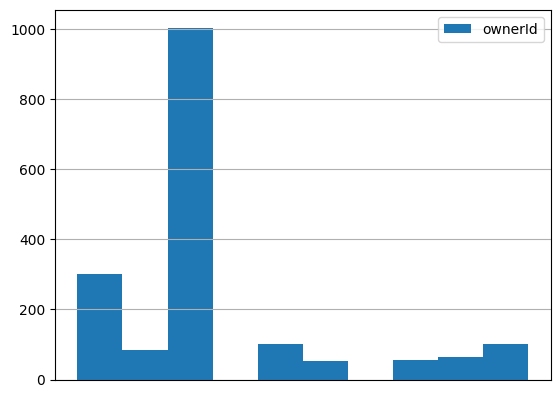

In [29]:
tracksPlaylistsDf["ownerId"].hist(legend=True)

plt.xticks(ticks=[])
plt.show()

In [30]:
tracksPlaylistsDf["ownerId"].value_counts()

ownerId
manzl017                        1004
beatportprofile                  300
yeahthejacko                     100
lithuaniahq                      100
317j7n6nrjhmndfpji3m75372mpm      85
119701354                         65
guenther-patrick                  56
5ha8mupe4kz2xlrf8dpr7llxd         53
Name: count, dtype: int64